# read data

Install the required packages using pip
* Install using pip : `pandas`, `sklearn`, `matplotlib`, `statsmodels`
* This code was developed in Python 3.8 and any other versions are allowed.

In [49]:
import numpy as np  #for numeric computations like log, exp, sqrt
import pandas as pd #for reading & storing data, pre=processing
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt #for visualization
import statsmodels.api as sm
from scipy import stats

## Read Data

Read '.csv' file in the form of DataFrame (pandas.DataFrame) through 'read_csv' method in Pandas. 

* Else, read using 'read_excel' method. 
* If there is 'Date' column, indexing is possible by specifying 'index_col' as below.

In [50]:
# use your own data
data = pd.read_csv('stockPrice.csv', index_col='date')


It is convenient to change Date dtype from 'object' to 'datetime'.

In [51]:
# check index type
data.index

Index(['1980-12-12', '1980-12-15', '1980-12-16', '1980-12-17', '1980-12-18',
       '1980-12-19', '1980-12-22', '1980-12-23', '1980-12-24', '1980-12-26',
       ...
       '2022-09-12', '2022-09-13', '2022-09-14', '2022-09-15', '2022-09-16',
       '2022-09-19', '2022-09-20', '2022-09-21', '2022-09-22', '2022-09-23'],
      dtype='object', name='date', length=10534)


Convert index type using 'pd.to_datetime' method.

In [52]:
# convert index type to datetime
data.index = pd.to_datetime(data.index)

In [53]:
# Check that dtype has changed to datetime
data.index

DatetimeIndex(['1980-12-12', '1980-12-15', '1980-12-16', '1980-12-17',
               '1980-12-18', '1980-12-19', '1980-12-22', '1980-12-23',
               '1980-12-24', '1980-12-26',
               ...
               '2022-09-12', '2022-09-13', '2022-09-14', '2022-09-15',
               '2022-09-16', '2022-09-19', '2022-09-20', '2022-09-21',
               '2022-09-22', '2022-09-23'],
              dtype='datetime64[ns]', name='date', length=10534, freq=None)

Filter data with are not about opening price

In [54]:
data.drop(['high', 'low', 'close', 'volume'], axis = 1, inplace=True)

## Your Data Overview


Visualize your data using 'plot()' function.

<AxesSubplot: xlabel='date'>

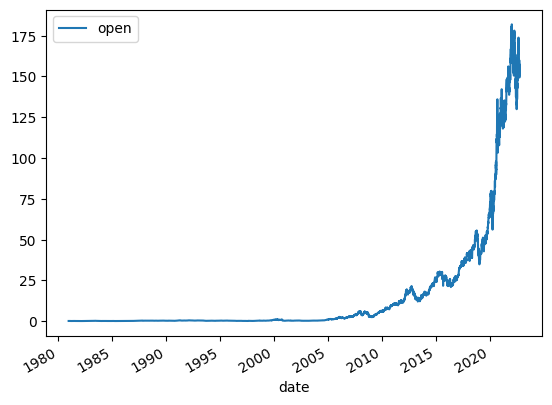

In [55]:
data.plot()

### Plot Scatter


Shift your data by one time step interval through 'shift(1)' and draw a scatter plot.

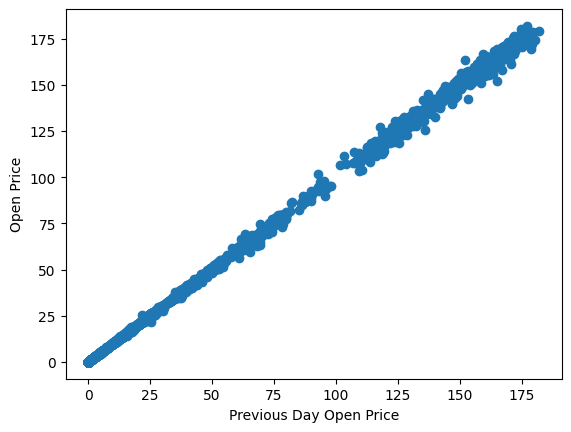

In [56]:
plt.scatter(data.shift(1)[1:], data[1:])
plt.xlabel('Previous Day Open Price')
plt.ylabel('Open Price');

### Resample Data

Follow this part if you need to resample your data.

Set a different period using the `resample` (In this example,the period is changed from daily to monthly).

In [57]:
# monthly_data = data.resample('M').first() # resample with closing price on the first trading day of the month 
# monthly_data = data.resample('M').mean() # resample with monthly average closing price
monthly_data = data.resample('M').last() # resample with closing price on the last trading day of the month 

In [58]:
monthly_data.head()

,open
date,
1980-12-31,0.1195
1981-01-31,0.0994
1981-02-28,0.0924
1981-03-31,0.0863
1981-04-30,0.0990


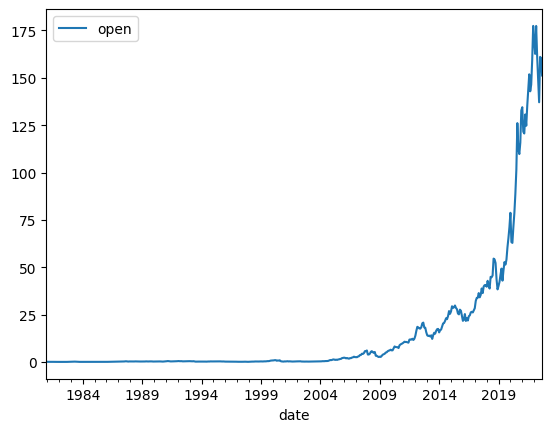

In [59]:
# visualize resampled data
monthly_data.plot();

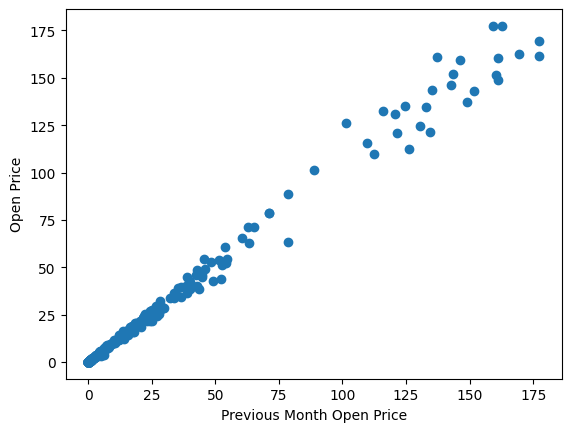

In [60]:
# Relationship with the previous month
plt.scatter(monthly_data.shift(1)[1:], monthly_data[1:])
plt.xlabel('Previous Month Open Price')
plt.ylabel('Open Price');

## Define Variables

Set x so that can represent time as the length of data.


In [61]:
x = np.arange(len(data))
x

array([    0,     1,     2, ..., 10531, 10532, 10533])

Set y as the target of your analysis.

In [62]:
# y = data.values.reshape(-1,1)
y = data.values
y

array([[1.0030e-01],
       [9.5500e-02],
       [8.8500e-02],
       ...,
       [1.5734e+02],
       [1.5238e+02],
       [1.5119e+02]])

## Linear Regression

How to run the Linear Regression

$$y=w_0+w_1 x =\begin{bmatrix}
w_0 & w_1
\end{bmatrix}   \begin{bmatrix}
1\\
x
\end{bmatrix} = \mathbf{w}\mathbf{x}$$




Find the parameter $\mathbf{w}$ based on linear regression model above.


Calculate vector $\mathbf{x}$.
Use `add_constant` method in statsmodels.

In [63]:
X = sm.add_constant(x)  # add_constant로 상수 부분을 나타내는 부분 만듦
X

array([[1.0000e+00, 0.0000e+00],
       [1.0000e+00, 1.0000e+00],
       [1.0000e+00, 2.0000e+00],
       ...,
       [1.0000e+00, 1.0531e+04],
       [1.0000e+00, 1.0532e+04],
       [1.0000e+00, 1.0533e+04]])



Now, $y$ and $\mathbf{x}$ are ready. Find $\mathbf{w}$ to minimize the residual.



Use 'OLS.fit()' in statsmodels to fit linear model.
Use `summary()` method to analyze the result of model(p-value, R-squared, etc).



*   Fitting means to optimize $\mathbf{w}$.
*   Ordinary Least Square (OLS) can be utilized to minimize Mean Squared Error (MSE).



### Fitting Linear Regression

In [64]:
lin_reg = sm.OLS(y, X).fit()
print(lin_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.402
Model:                            OLS   Adj. R-squared:                  0.402
Method:                 Least Squares   F-statistic:                     7080.
Date:                Thu, 18 May 2023   Prob (F-statistic):               0.00
Time:                        19:47:38   Log-Likelihood:                -49205.
No. Observations:               10534   AIC:                         9.841e+04
Df Residuals:                   10532   BIC:                         9.843e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -21.6986      0.504    -43.081      0.0



Calculate the parameter $\mathbf{w}$ using `params` method.

In [65]:
lin_reg.params # w_0, w_1

array([-2.16985532e+01,  6.96875866e-03])

In [66]:
intercept=lin_reg.params[0]
coef = lin_reg.params[1]

In [67]:
intercept

-21.698553153855585

In [68]:
coef

0.006968758659242058

Finally, $$y=-21.6986+0.0070 x$$ is obtained.

### Plot Linear Regression Results


Use the `predict` method to calculate the model prediction for input x

* Plot with your data

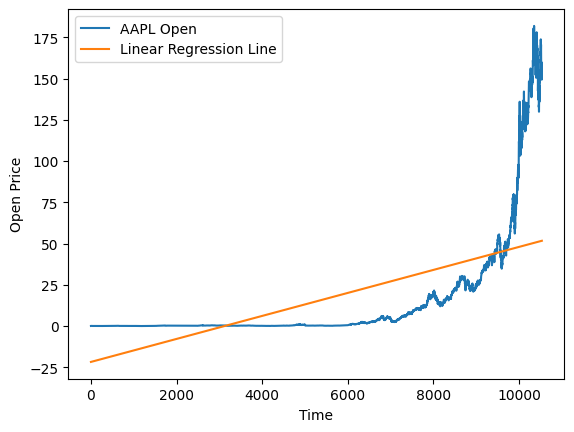

In [69]:
plt.plot(x,y,label='AAPL Open') # original data

y_hat = lin_reg.predict(X)
plt.plot(x,y_hat,label='Linear Regression Line') # regression line

plt.xlabel('Time')
plt.ylabel('Open Price')
plt.legend();

### Linear Regression MSE


Calculate Mean Squared Error (MSE) of model using `mse_resid` method.

In [70]:
# MSE
lin_reg.mse_resid

668.1587602478692

## Linear Regression does not work well
## So try other way

In [19]:
from statsmodels.tsa.stattools import adfuller

def adf_test(data):
    result = adfuller(data.values)
    print('ADF Statistics: %f' % result[0])
    print('p-value: %f' % result[1])
    print('num of lags: %f' % result[2])
    print('num of observations: %f' % result[3])
    print('Critical values:')
    for k, v in result[4].items():
        print('\t%s: %.3f' % (k,v))

In [20]:
adf_test(monthly_data)

ADF Statistics: 0.434984
p-value: 0.982757
num of lags: 18.000000
num of observations: 483.000000
Critical values:
	1%: -3.444
	5%: -2.868
	10%: -2.570


As p-value is greater than 0.05

Data is not stationaly

So, differentiate data

In [22]:
#1st diffrence
diff_df = monthly_data['open'].diff(periods=1).iloc[1:]

print('Raw data')
print(monthly_data)

print('After 1st difference')
print(diff_df)

Raw data
                open
date                
1980-12-31    0.1195
1981-01-31    0.0994
1981-02-28    0.0924
1981-03-31    0.0863
1981-04-30    0.0990
...              ...
2022-05-31  148.8629
2022-06-30  137.0594
2022-07-31  161.0160
2022-08-31  160.3050
2022-09-30  151.1900

[502 rows x 1 columns]
After 1st difference
date
1981-01-31    -0.0201
1981-02-28    -0.0070
1981-03-31    -0.0061
1981-04-30     0.0127
1981-05-31     0.0166
               ...   
2022-05-31   -12.5163
2022-06-30   -11.8035
2022-07-31    23.9566
2022-08-31    -0.7110
2022-09-30    -9.1150
Freq: M, Name: open, Length: 501, dtype: float64


<AxesSubplot: xlabel='date'>

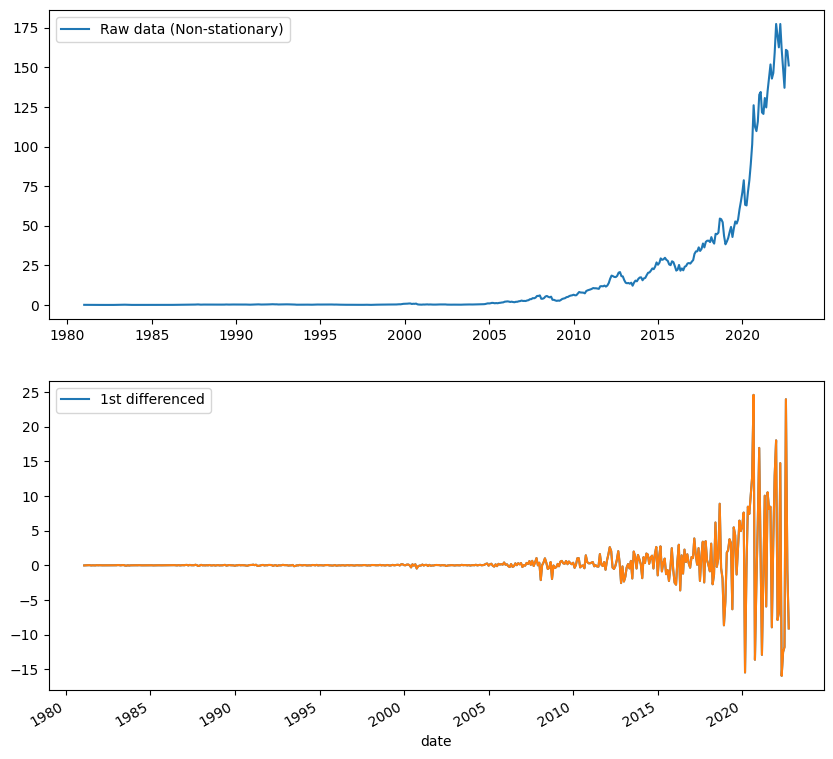

In [23]:
plt.figure(figsize=(10,10))

ax1 = plt.subplot(211)
ax1.plot(monthly_data['open'])
ax1.legend(['Raw data (Non-stationary)'])

ax2 =plt.subplot(212)
ax2.plot(diff_df)
ax2.legend(['1st differenced'])

diff_df.plot()

In [24]:
adf_test(diff_df)

ADF Statistics: -2.259651
p-value: 0.185312
num of lags: 18.000000
num of observations: 482.000000
Critical values:
	1%: -3.444
	5%: -2.868
	10%: -2.570


자동으로 미분 횟수를 구하기

In [31]:
from pmdarima.arima import ndiffs
import pmdarima as pm

In [30]:
n_diffs = ndiffs(monthly_data, alpha=0.05, test='adf', max_d=6      )
print(f"추정된 차수 d = {n_diffs}") # 결과

추정된 차수 d = 1


In [32]:
model = pm.auto_arima(monthly_data, d=n_diffs,
                      start_p=0, start_q=0, max_order=13, 
                      test='adf', 
                      seasonal=False, stepwise=True, trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2592.486, Time=0.16 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2593.804, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2593.197, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2594.904, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2590.432, Time=0.21 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2568.556, Time=0.18 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=2566.626, Time=0.10 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=2568.401, Time=0.14 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=2563.309, Time=0.37 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=2536.679, Time=0.32 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=2535.779, Time=0.26 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=2535.496, Time=0.30 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=2536.907, Time=0.40 sec
 ARIMA(5,1,0)(0,0,0)[0]             : AIC=2538.068, Time=0.13 sec

Best model:  ARIMA(5,1,0)(0,0,0)

In [33]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  502
Model:               SARIMAX(5, 1, 0)   Log Likelihood               -1260.748
Date:                Thu, 18 May 2023   AIC                           2535.496
Time:                        19:39:29   BIC                           2565.012
Sample:                    12-31-1980   HQIC                          2547.077
                         - 09-30-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.2945      0.172      1.708      0.088      -0.044       0.632
ar.L1          0.0674      0.021      3.174      0.002       0.026       0.109
ar.L2         -0.1854      0.023     -7.910      0.000      -0.231      -0.139
ar.L3         -0.0616      0.018     -3.416      0.001      -0.097      -0.026
ar.L4          0.2869      0.018     15.707      0.000       0.251       0.323
ar.L5         -0.0734      0.021     -3.425      0.001      -0.115      -0.031
sigma2         8.9714      0.184     48.793      0.000       8.611       9.332
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):             12048.74
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):             303.97   Skew:                             0.91
Prob(H) (two-sided):                  0.00   Kurtosis:                        26.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Residual은 correlation이 없어야함

이를 위해서 확인하는 통계 분포 검정

Ljung-Box prob(Q)>0.05 -> residual is white noise

귀무가설이 잔차들이 white noise일 것이다


Jarque-Bera prob(JB)>0.05 -> residual is stationary

귀무가설이 잔차는 정적 분포일 것이다 - 확률변수 간의 확률 분포가 시간에 상관없이 일정한 확률 과정

### 실제로 모델을 구축하고 예측하는 테스트까지 해보기

데이터 분리 - test, train

In [71]:
train_df, test_df = monthly_data[:int(len(monthly_data)*0.9)], monthly_data[int(len(monthly_data)*0.9):]

In [73]:
n_diffs = ndiffs(train_df, alpha=0.05, test='adf', max_d=6      )
print(f"추정된 차수 d = {n_diffs}") # 결과

추정된 차수 d = 1


In [80]:
auto = pm.auto_arima(train_df, d=n_diffs,
                      start_p=0, start_q=0, max_order=13, 
                      test='adf', 
                      seasonal=False, stepwise=True, trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1079.293, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1078.483, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1078.345, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1084.158, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1074.702, Time=0.28 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1068.520, Time=0.34 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1079.610, Time=0.09 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=1061.317, Time=0.44 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=1064.371, Time=0.14 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=1062.569, Time=0.51 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=1060.486, Time=0.48 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1070.384, Time=0.47 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=1057.355, Time=0.73 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=1040.806, Time=0.92 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept

In [81]:
auto.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  451
Model:               SARIMAX(5, 1, 2)   Log Likelihood                -511.403
Date:                Thu, 18 May 2023   AIC                           1040.806
Time:                        20:25:37   BIC                           1077.790
Sample:                    12-31-1980   HQIC                          1055.383
                         - 06-30-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0259      0.015      1.680      0.093      -0.004       0.056
ar.L1          1.2708      0.052     24.284      0.000       1.168       1.373
ar.L2         -0.6939      0.057    -12.278      0.000      -0.805      -0.583
ar.L3          0.1988      0.040      4.938      0.000       0.120       0.278
ar.L4         -0.2745      0.036     -7.667      0.000      -0.345      -0.204
ar.L5          0.2449      0.021     11.395      0.000       0.203       0.287
ma.L1         -1.4064      0.045    -30.943      0.000      -1.495      -1.317
ma.L2          0.7942      0.045     17.514      0.000       0.705       0.883
sigma2         0.5674      0.018     31.570      0.000       0.532       0.603
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              1612.35
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):             272.50   Skew:                             0.60
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [87]:
test = test_df["open"]

In [88]:
from sklearn.metrics import mean_squared_error
from pmdarima.metrics import smape

model = auto  # seeded from the model we've already fit

def forecast_one_step():
    fc, conf_int = model.predict(n_periods=1, return_conf_int=True)
    return (
        fc.tolist()[0],
        np.asarray(conf_int).tolist()[0])

forecasts = []
confidence_intervals = []

for new_ob in test:
    fc, conf = forecast_one_step()
    forecasts.append(fc)
    confidence_intervals.append(conf)

    # Updates the existing model with a small number of MLE steps
    model.update(new_ob)

print(f"Mean squared error: {mean_squared_error(test, forecasts)}")
print(f"SMAPE: {smape(test, forecasts)}")
# Mean squared error: 0.34238951346274243
# SMAPE: 0.9825490519101439

Mean squared error: 111.88459955784676
SMAPE: 8.358316443156864


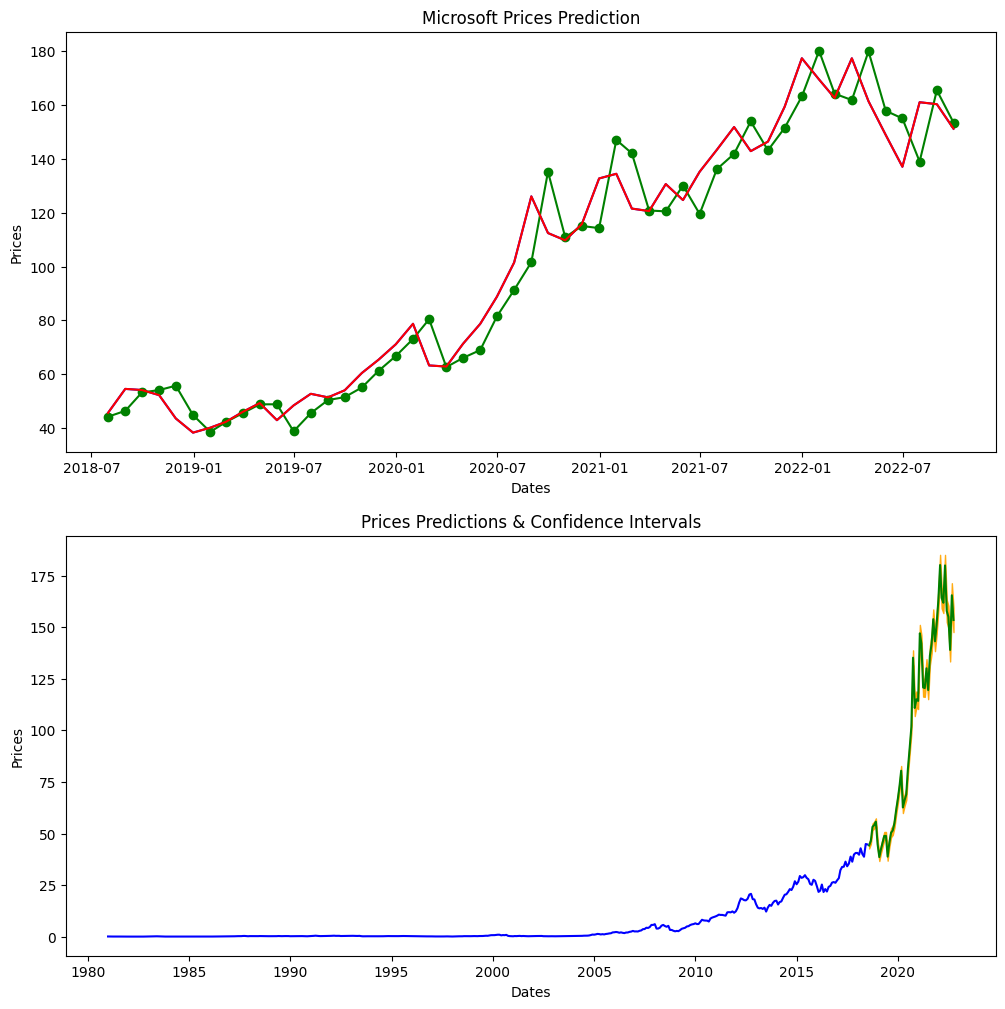

In [90]:
fig, axes = plt.subplots(2, 1, figsize=(12, 12))

# --------------------- Actual vs. Predicted --------------------------
axes[0].plot(test, color='blue', label='Training Data')
axes[0].plot(test_df.index, forecasts, color='green', marker='o',
             label='Predicted Price')

axes[0].plot(test_df.index, test, color='red', label='Actual Price')
axes[0].set_title('Microsoft Prices Prediction')
axes[0].set_xlabel('Dates')
axes[0].set_ylabel('Prices')


# ------------------ Predicted with confidence intervals ----------------
axes[1].plot(train_df, color='blue', label='Training Data')
axes[1].plot(test_df.index, forecasts, color='green',
             label='Predicted Price')

axes[1].set_title('Prices Predictions & Confidence Intervals')
axes[1].set_xlabel('Dates')
axes[1].set_ylabel('Prices')

conf_int = np.asarray(confidence_intervals)
axes[1].fill_between(test_df.index,
                     conf_int[:, 0], conf_int[:, 1],
                     alpha=0.9, color='orange',
                     label="Confidence Intervals")

https://alkaline-ml.com/pmdarima/usecases/stocks.html